## State-Space models and the Kalman ﬁlter

考虑如下模型：

$$ y_t = \alpha_{t-1}+e_t $$
$$ \alpha_{t} = .9\alpha_{t-1}+\mu_t $$

其中$ \sigma^2_e=.8,\sigma^2_\mu=.4 $

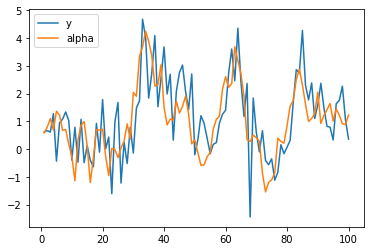

In [2]:
import pandas as pd
import numpy as np
import random
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# 生成模拟数据
n = 100
random.seed(1123)
e = math.sqrt(0.8)*np.random.randn(n)
u = math.sqrt(0.4)*np.random.randn(n)
y = []
alpha = []
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(alpha[t-1]+e[t])
    alpha.append(0.9*alpha[t-1]+u[t])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.legend()

初始化$a_1=0，p_1=2.11$

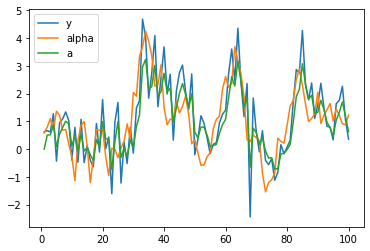

In [3]:
# implement the kalman filter
n = 100
sigmae=0.8
sigmau=0.4
w=0.9
z=1
a=[0] 
p=[2.11]
k=[0]
v=[0]
for t in range(1,n):
    k.append((z*w*p[t-1])/(z*z*p[t-1]+sigmau))
    p.append(w*w*p[t-1]-w*z*k[t]*p[t-1]+sigmau)
    v.append(y[t]-z*a[t-1])
    a.append(w*a[t-1]+k[t]*v[t])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.plot(np.linspace(1,100,100),a,label="a")
plt.legend()
plt.show()

## Likelihood function and model estimation

### 一般的Likelihood function

Optimization terminated successfully.
         Current function value: 178.331849
         Iterations: 55
         Function evaluations: 103
The results of the standard KF approach
[0.9226674  0.28679191 0.34420819 0.53264896]
The true parameters
[0.86, 0.5, 0.05, 0.6]


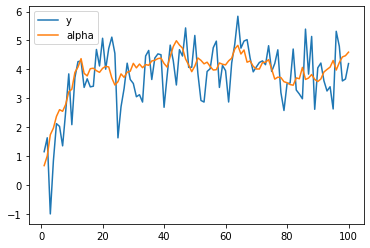

In [4]:
from scipy import optimize
n = 100
random.seed(1)
su = 0.05
se = 0.5
e = math.sqrt(se)*np.random.randn(n)
u = math.sqrt(su)*np.random.randn(n)
z=1
wreal=0.86 # 最大似然要估计的参数
const=0.6
############## 生成模拟数据 ###############
y=[]
alpha=[]
y.append(const+e[0])
alpha.append(const+u[0])
for t in range(1,n):
    y.append(z*alpha[t-1]+e[t])
    alpha.append(const+wreal*alpha[t-1]+u[t])
############## standard Kalman filter approach ##############
a=[0]
p=[10]
k=[0]
v=[0]
def fu(mypa):
    # 需要估计的参数
    w=abs(mypa[0])
    se=abs(mypa[1])
    su=abs(mypa[2])
    co=abs(mypa[3])
    # 构建函数
    z=1
    likelihood = 0
    for t in range(1,n):
        k.append((z*w*p[t-1])/(z**2*p[t-1]+se))
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+su)
        v.append(y[t]-z*a[t-1])
        a.append(co+w*a[t-1]+k[t]*v[t])
        likelihood = likelihood+0.5+0.5*math.log(2*math.pi)+0.5*math.log(z**2*p[t-1]+se)+0.5*(v[t]**2/(z**2*p[t-1]+se))
    return likelihood
# Nelder-Mead算法
result = optimize.fmin(fu, [0.85, 0.5,0.3,0.5])
print("The results of the standard KF approach")
print(result)
print("The true parameters")
print([wreal,se,su,const])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.legend()
plt.show()

### Concentrated Log-likelihood 

In [5]:
n=100
random.seed(61)
su=0.1
se=0.4
qreal=su/se
e = math.sqrt(se)*np.random.randn(n)
u = math.sqrt(su)*np.random.randn(n)
z=1
wreal=0.97
############## 生成模拟数据 ###############
y=[]
alpha=[]
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(z*alpha[t-1]+e[t])
    alpha.append(wreal*alpha[t-1]+u[t])
############## standard Kalman filter approach ##############
a=[]
p=[]
a.append(0)
p.append(10)
k=[0]
v=[0]
def fu2(mypa):
    w=abs(mypa[0])
    q=abs(mypa[1])
    z=1
    likelihood=0
    sigmae=0
    for t in range(1,n):
        k.append((z*w*p[t-1])/(z**2*p[t-1]+1))
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
        v.append(y[t]-z*a[t-1])
        a.append(w*a[t-1]+k[t]*v[t])  
        sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood = likelihood+0.5*math.log(2*math.pi)+0.5+0.5*math.log(z**2*p[t-1]+1)
    return likelihood+0.5*n*math.log(sigmae/n)
# Nelder-Mead算法
result = optimize.fmin(fu2, [0.85, 0.5])
print("The results of the standard KF approach")
print(result)
print("The true parameters")
print([wreal,qreal])

Optimization terminated successfully.
         Current function value: 129.583327
         Iterations: 10
         Function evaluations: 39
The results of the standard KF approach
[0.85 0.5 ]
The true parameters
[0.97, 0.25]


## State-Space models and the Kalman ﬁlter in action

### example1
state-space model：
$$ y_t=\alpha_{t-1}+e_t $$
$$ \alpha_t=.2+.85\alpha_{t-1}+\mu_t $$

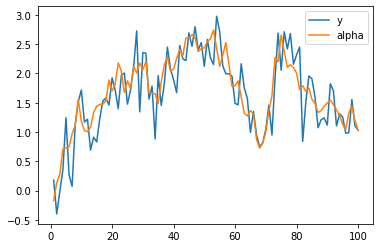

In [6]:
# 生成模拟数据
n = 100
random.seed(1265)
e = math.sqrt(0.1)*np.random.randn(n)
u = math.sqrt(0.05)*np.random.randn(n)
constant=0.2
y = []
alpha = []
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(alpha[t-1]+e[t])
    alpha.append(constant+0.85*alpha[t-1]+u[t])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.legend()

In [7]:
############## standard Kalman filter approach ##############
a=[]
p=[]
a.append(0)
p.append(1)
k=[0]
v=[0]
z=1
def fu3(mypa):
    w=abs(mypa[0])
    q=abs(mypa[1])
    co=abs(mypa[2])
    likelihood=0
    sigmae=0
    for t in range(1,n):
        k.append((z*w*p[t-1])/(z**2*p[t-1]+1))
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
        v.append(y[t]-z*a[t-1])
        a.append(co+w*a[t-1]+k[t]*v[t])  
        sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood = likelihood+0.5*math.log(2*math.pi)+0.5+0.5*math.log(z**2*p[t-1]+1)
    return likelihood+0.5*n*math.log(sigmae/n)
# Nelder-Mead算法
result = optimize.fmin(fu3, [0.9, 1,0.1])
w=abs(result[0])
q=abs(result[1])
co=abs(result[2])
likelihood=0
sigmae=0
for t in range(1,n):
    k[t]=((z*w*p[t-1])/(z**2*p[t-1]+1))
    p[t]=w**2*p[t-1]-w*z*k[t]*p[t-1]+q
    v[t]=y[t]-z*a[t-1]
    a[t]=co+w*a[t-1]+k[t]*v[t]  
    sigmae=sigmae+v[t]**2/(z**2*p[t-1]+1)
    likelihood = likelihood+0.5*math.log(2*math.pi)+0.5+0.5*math.log(z**2*p[t-1]+1)

likelihood=likelihood+0.5*n*math.log(sigmae/n)
sigmae=sigmae/n
sigmau=q*sigmae
print([co,w,z,sigmae,sigmau])

Optimization terminated successfully.
         Current function value: 61.643802
         Iterations: 10
         Function evaluations: 49
[0.1, 0.9, 1, 0.08417860456411151, 0.08417860456411151]


### example2
state-space model：
$$ y_t=\alpha_{t-1}+e_t $$
$$ \alpha_t=\alpha_{t-1}+\mu_t $$

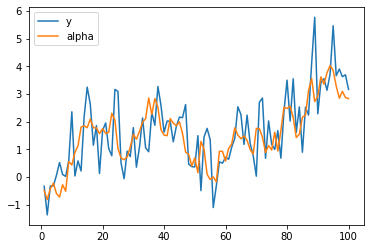

In [8]:
# 生成模拟数据
n = 100
random.seed(153)
e = math.sqrt(0.5)*np.random.randn(n)
u = math.sqrt(0.2)*np.random.randn(n)
y = []
alpha = []
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(alpha[t-1]+e[t])
    alpha.append(alpha[t-1]+u[t])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.legend()

In [9]:
############## standard Kalman filter approach ##############
a=[]
p=[]
a.append(0)
p.append(10000)
k=[0]
v=[0]
z=w=1
def fu4(mypa):
    q=abs(mypa)
    likelihood=0
    sigmae=0
    for t in range(1,n):
        k.append((z*w*p[t-1])/(z**2*p[t-1]+1))
        p.append(w**2*p[t-1]-w*z*k[t]*p[t-1]+q)
        v.append(y[t]-z*a[t-1])
        a.append(w*a[t-1]+k[t]*v[t])  
        sigmae=sigmae+(v[t]**2/(z**2*p[t-1]+1))
        likelihood = likelihood+0.5*math.log(2*math.pi)+0.5+0.5*math.log(z**2*p[t-1]+1)
    return likelihood+0.5*n*math.log(sigmae/n)
# Nelder-Mead算法
result = optimize.fmin(fu4, 0.2)
print("The results of the standard KF approach")
print(result)

Optimization terminated successfully.
         Current function value: 147.234423
         Iterations: 8
         Function evaluations: 23
The results of the standard KF approach
[0.2]


## Single Source of Error approach

### The exponential smoothing with one source of error

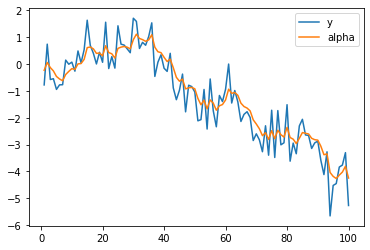

In [10]:
## 产生模拟数据
n = 100
random.seed(231)
e = math.sqrt(0.6)*np.random.randn(n)
gamma=0.3
u = gamma*e
y = []
alpha = []
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(alpha[t-1]+e[t])
    alpha.append(alpha[t-1]+u[t])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.legend()

In [11]:
## estimate the model
from numpy import *
a=[]
a.append(y[0])
def fu5(mypa):
    gamma=abs(mypa)
    e=[0]
    for t in range(1,n):
        e.append(y[t]-a[t-1])
        a.append(a[t-1]+gamma*e[t])
    e=array(e)
    return sum(multiply(e,e))/n
# Nelder-Mead算法
result = optimize.fmin(fu5, 0.2)
print(result)

Optimization terminated successfully.
         Current function value: 0.582175
         Iterations: 8
         Function evaluations: 23
[0.2]


### The Theta method with one source of error

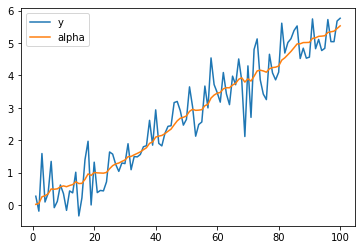

In [12]:
## 产生模拟数据
n = 100
random.seed(5)
e = math.sqrt(0.4)*np.random.randn(n)
gamma=0.1
con=0.05
u = gamma*e
y = []
alpha = []
y.append(e[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(alpha[t-1]+e[t])
    alpha.append(con+alpha[t-1]+u[t])
plt.plot(np.linspace(1,100,100),y,label="y")
plt.plot(np.linspace(1,100,100),alpha,label="alpha")
plt.legend()

In [13]:
## estimate this model with the two recursions
a=[]
a.append(y[0])
def fu6(mypa):
    e=[0]
    gamma=abs(mypa[0])
    co=abs(mypa[1])
    for t in range(1,n):
        e.append(y[t]-a[t-1])
        a.append(co+a[t-1]+gamma*e[t])
    e=array(e)
    return sum(multiply(e,e))/n
# Nelder-Mead算法
result = optimize.fmin(fu6, [0.2,0.1])
print(result)

Optimization terminated successfully.
         Current function value: 0.413733
         Iterations: 8
         Function evaluations: 31
[0.2 0.1]


## Seasonality

### Additive seasonality
假设我们有一个季度数据，即每年观察4次的序列：

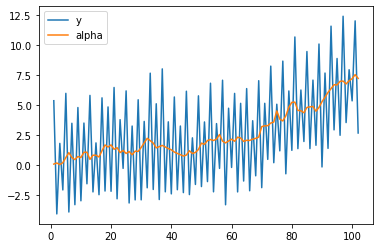

In [14]:
## 产生模拟数据
n = 102
random.seed(1213)
e = math.sqrt(0.5)*np.random.randn(n)
u = math.sqrt(0.1)*np.random.randn(n)
y=[]
alpha=[]
factor=[5,-4,2,-3]
s=4
seasonal=(factor*math.ceil(n/s))[0:n]
y.append(e[0]+seasonal[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(seasonal[t]+alpha[t-1]+e[t])
    alpha.append(alpha[t-1]+u[t])
plt.plot(np.linspace(1,102,102),y,label="y")
plt.plot(np.linspace(1,102,102),alpha,label="alpha")
plt.legend()

利用移动平均法去除季节性因素：

1).Take the centered moving average of the series, call it $CMA_t$

2).Subtract the CMA from the original series $residuals_t=y_t-CMA_t$

3).Average the elements of $residuals_t$ by season and obtain the seasonal factor 

4).Subtract the element of $y_t$ by the corresponding seasonal factor

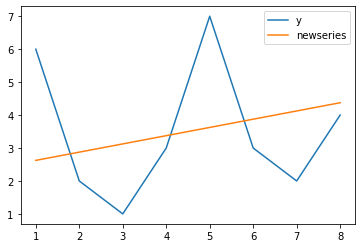

In [15]:
## 理解移动平均法-测试
def seq(a,b):
    c=[]
    for t in b:
        c.append(a[t])
    return c
y=array([6,2,1,3,7,3,2,4])
s=4
n=len(y)
#This create the weights to be used in the moving average
w=array([1/(2*s)]*(s+1))
w[1:s]=1/s
#This create the centered moving average vector
cma=array([nan]*len(y))
#This calculate the centered moving averag
for g in range(0,len(y)-s):
    cma[g+int(s/2)]=sum(w*y[g:(g+s+1)])
#This is the residuals
residuals = y-cma
#this creates the s factors as we want
factors=[]
for seas in range(0,s):
    m=array(seq(residuals,range(seas, len(y)-s+seas+1,s)))
    factors.append(mean(m[~pd.isnull(m)]))
#This allows to demean the factors variable
factors=array(factors)-array([mean(factors)]*s)
#this is the last step: we take out the seasonal component
newseries = y-tile(factors, math.ceil(n/s))[0:n]
plt.plot(np.linspace(1,8,8),y,label="y")
plt.plot(np.linspace(1,8,8),newseries,label="newseries")
plt.legend()

生成模拟数据来测试

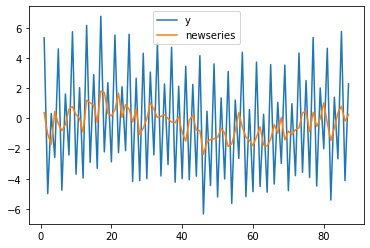

In [16]:
## 产生模拟数据
n = 87
random.seed(243)
e = math.sqrt(0.3)*np.random.randn(n)
u = math.sqrt(0.1)*np.random.randn(n)
y=[]
alpha=[]
factor=[5,-4,2,-3]
s=4
seasonal=(factor*math.ceil(n/s))[0:n]

y.append(e[0]+seasonal[0])
alpha.append(u[0])
for t in range(1,n):
    y.append(seasonal[t]+alpha[t-1]+e[t])
    alpha.append(alpha[t-1]+u[t])

## taking out the seasonal component
#This create the weights to be used in the moving average
w=array([1/(2*s)]*(s+1))
w[1:s]=1/s
#This create the centered moving average vector
cma=array([nan]*len(y))
#This calculate the centered moving averag
for g in range(0,len(y)-s):
    cma[g+int(s/2)]=sum(w*y[g:(g+s+1)])
#This is the residuals
residuals = y-cma
#this creates the s factors as we want
factors=[]
for seas in range(0,s):
    m=array(seq(residuals,range(seas, len(y)-s+seas+1,s)))
    factors.append(mean(m[~pd.isnull(m)]))
#This allows to demean the factors variable
factors=array(factors)-array([mean(factors)]*s)
#this is the last step: we take out the seasonal component
newseries = y-tile(factors, math.ceil(n/s))[0:n]
plt.plot(np.linspace(1,87,87),y,label="y")
plt.plot(np.linspace(1,87,87),newseries,label="newseries")
plt.legend()

In [74]:
print(factor)

[5, -4, 2, -3]


In [75]:
print(factors)

[ 4.95757985 -3.94737629  2.03773947 -3.04794303]


### Multiplicative seasonality

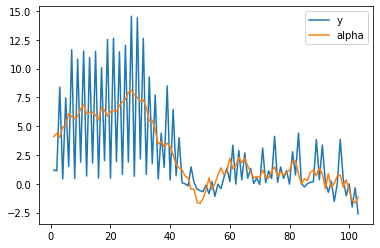

In [17]:
## 产生模拟数据
n = 103
s=4
random.seed(7)
e = math.sqrt(0.5)*np.random.randn(n)
u = math.sqrt(0.4)*np.random.randn(n)
y=[]
alpha=[]
factor=[1.7,0.3,1.9,0.1]
seasonal=(factor*math.ceil(n/s))[0:n]
y.append(e[0])
alpha.append(5+u[0])
for t in range(1,n):
    y.append(seasonal[t]*(alpha[t-1]+e[t]))
    alpha.append(alpha[t-1]+u[t])
plt.plot(np.linspace(1,103,103),y,label="y")
plt.plot(np.linspace(1,103,103),alpha,label="alpha")
plt.legend()

移动平均法去除季节性因素：

1).Take the centered moving average of the series, call it $CMA_t$

2).Divide the CMA from the original series $residuals_t=y_t/CMA_t$

3).Average the elements of $residuals_t$ by season and obtain the seasonal factor

4).Divide the element of $y_t$ by the corresponding seasonal factor

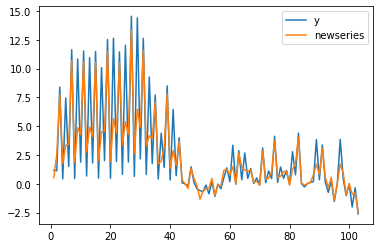

In [18]:
## Extract the seasonal component
#This create the weights to be used in the moving average
w=array([1/(2*s)]*(s+1))
w[1:s]=1/s
#This create the centered moving average vector
cma=array([nan]*len(y))
#This calculate the centered moving averag
for g in range(0,len(y)-s):
    cma[g+int(s/2)]=sum(w*y[g:(g+s+1)])
#This is the residuals
residuals = y/cma
#this creates the s factors as we want
factors=[]
for seas in range(0,s):
    m=array(seq(residuals,range(seas, len(y)-s+seas+1,s)))
    factors.append(mean(m[~pd.isnull(m)]))
#This allows to demean the factors variable
factors=array(factors)*4/sum(factors)
#this is the last step: we take out the seasonal component
newseries = y/tile(factors, math.ceil(n/s))[0:n]
plt.plot(np.linspace(1,n,n),y,label="y")
plt.plot(np.linspace(1,n,n),newseries,label="newseries")
plt.legend()

In [19]:
print(factor)

[1.7, 0.3, 1.9, 0.1]


In [20]:
print(factors)

[2.2256454  0.44149955 1.08748357 0.24537148]
